## Import the necessary libraries
 - gym contains the enviroment.
 - time is for calculate the total time of the runs.
 - random is for obtain certain random number, mostly for the greedy policy.
 - numpy is for managing data.
 - math is for use math functions.
 - seaborn and matplotlib.pyplot is for ploting, seaborn has to be installed on the local enviroment.

In [128]:
#pip install gym pygame
import gym
import time
from random import randint

import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

## Main functions for the enviroment and agent.

In [129]:
# Declare constants for buckets.
POSITION_SIZE = 2
VELOCITY_SIZE = 2
ANGLE_BINS_SIZE = 12
ANGULAR_VELOCITY_BINS_SIZE = 10

position_bins = np.linspace(-math.inf, math.inf, POSITION_SIZE)
velocity_bins = np.linspace(-math.inf, math.inf, VELOCITY_SIZE)
angle_bins = np.linspace(-0.2095, 0.2095, ANGLE_BINS_SIZE)
angular_velocity_bins = np.linspace(-2.5, 2.5, ANGULAR_VELOCITY_BINS_SIZE)

discount_factor = 0.9

env = gym.make('CartPole-v1')


def epsilon_greedy_policy(state, Q, epsilon):
    if np.random.random() < epsilon:
        action = randint(0, 1)
    else:
        action = np.argmax(Q[state])
    return action


def optimal_policy(state, Q):
    action = np.argmax(Q[state])
    return action


def get_state(obs):
    # Discretize the state.
    return np.digitize(obs[0], position_bins), np.digitize(obs[1], velocity_bins), np.digitize(obs[2], angle_bins), np.digitize(obs[3], angular_velocity_bins)


Q = np.zeros((POSITION_SIZE + 1, VELOCITY_SIZE + 1,
             ANGLE_BINS_SIZE + 1, ANGULAR_VELOCITY_BINS_SIZE + 1, 2))


def update_q(state, action, reward, new_state):
    Q[state][action] += (learning_rate * (reward +
                         discount_factor * np.max(Q[new_state]) - Q[state][action]))


def plot(xlabel, ylabel, data):
    print("Average " + ylabel + ": " + str(np.average(data)))
    print("Min " + ylabel + ": " + str(np.min(data)))
    print("Max " + ylabel + ": " + str(np.max(data)))

    sns.lineplot(range(len(data)), data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


/Users/agustinferreira2/opt/anaconda3/envs/gym/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/agustinferreira2/opt/anaconda3/envs/gym/lib/python3.9/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


## Training

I have trained with 10000 iterations
------- Training Timetaken(seconds) ----------------
18.732529163360596
Average Steps: 40.0843
Min Steps: 8
Max Steps: 276


/Users/agustinferreira2/opt/anaconda3/envs/gym/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


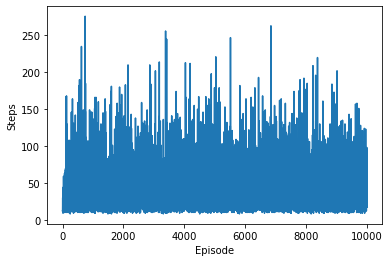

In [130]:
start = time.time()

# Params for training.
epsilon = 0.7
learning_rate = 0.9

episodes_of_training = 10000
# Array to analyze the training.
steps = [0] * episodes_of_training

for episode in range(episodes_of_training):
    obs = env.reset()
    current_state = get_state(obs)
    done = False
    while not done:
        steps[episode] += 1
        # Choose action
        action = epsilon_greedy_policy(current_state, Q, epsilon)
        # Update action
        obs, reward, done, info = env.step(action)
        new_state = get_state(obs)
        # Update Q.
        update_q(current_state, action, reward, new_state)
        current_state = new_state
print("I have trained with " + str(episodes_of_training) + " iterations")
end = time.time()
print("------- Training Timetaken(seconds) ----------------")
print(end-start)
plot("Episode", "Steps", steps)


## Running agent.

Agent runned with 10000 samples
Average Rewards: 263.9095
Min Rewards: 226.0
Max Rewards: 311.0


/Users/agustinferreira2/opt/anaconda3/envs/gym/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


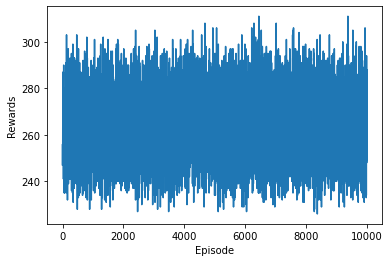

------- Timetaken(seconds) ----------------
87.86031794548035


In [131]:

def simulate_random_agent(number_of_samples):
    rewards = [0] * number_of_samples
    for index in range(number_of_samples):
        obs = env.reset()
        done = False
        while not done:
            policy = optimal_policy(get_state(obs), Q)
            obs, reward, done, _ = env.step(policy)
            rewards[index] += reward
            if done:
                env.reset()
    env.close()
    return rewards

start = time.time()

number_of_samples = 10000

print("Agent runned with " + str(number_of_samples) +" samples")

rewards = simulate_random_agent(number_of_samples)

plot("Episode", "Rewards", rewards)

end = time.time()
print("------- Timetaken(seconds) ----------------")
print(end-start)


# Se agrega una segunda dimension, si se entrena con 1000 episodios son pocos para la cantidad de posibles estados (pasa de 12 a 120)
# y muestra performance promedio peor que la iteracion previa solamente con 12 estados.
# Se arranca a entrenar con 10000 episodios y tomar muestreos promedio del valor de la policy con 10000 episodios tambien.
# Se arrancan a ver valores arriba de 22 con constancia (con 10 bins, rango de -5 a 5), pero se ven muchos bins vacios o semi vacios

# Se sugiere probar cambiar el rango a valores mas cercanos a los observados (-2.5 a 2.5) y aumentra la cant de episodios.
# Con un espacio de 10 para la posicion, 5 para las velocidades como descrito rpeviamente, con 10k episodios de entrenamiento
# el valor esperado es de aprox 150
